# Data Science in a Day

# Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

# Loading Libraries

In [57]:
#import pandas library to read and manipulate and analyze data
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report


#import libraries for tree visualisation
import graphviz
import pydotplus

%matplotlib inline



# test

## Data Sourcing

In [2]:
loandata = pd.read_csv('loan_data.csv')

In [3]:
loandata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP-5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP-6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP-7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP-8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP-9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
type(loandata)


pandas.core.frame.DataFrame

In [5]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [6]:
loandata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,959.000000,967.000000,931.000000
mean,5179.795107,1601.916330,141.768509,340.078594,0.809882
std,5695.104533,2718.772806,77.899222,70.246667,0.392605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
loandata.head()
loandata.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
978,LP-978,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,0.0,Urban,N
979,LP-979,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,Y
980,LP-980,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [8]:
loandata.shape

(981, 13)

## Data Cleaning 

In [9]:
#check if any null values

loandata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#deal with Gender nulls
loandata['Gender'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [11]:
loandata = loandata.dropna(subset=['Gender'])

In [12]:
loandata.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#deal with N/A in married column

loandata['Married'].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Married, dtype: object

In [14]:
loandata['Married']=loandata['Married'].fillna('No')

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
loandata.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#dependents

In [17]:
loandata['Dependents'].value_counts()

0     548
1     159
2     158
3+     88
Name: Dependents, dtype: int64

In [18]:
loandata['Dependents']=loandata['Dependents'].fillna('0')

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
loandata['Self_Employed'].value_counts(dropna=0)

No     821
Yes    115
NaN     32
Name: Self_Employed, dtype: int64

In [20]:
loandata['Self_Employed']=loandata['Self_Employed'].fillna('No')

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
loandata['LoanAmount'].dtype

dtype('float64')

In [22]:

#deal with loanAmount
loandata['LoanAmount'].value_counts(dropna=0)


loandata = loandata.dropna(subset=['LoanAmount'])

In [23]:
loandata.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
loandata['Loan_Amount_Term'].value_counts(dropna=0)

 360.0    793
 180.0     63
 480.0     23
 300.0     19
NaN        14
 84.0       7
 240.0      7
 0.0        6
 120.0      4
 36.0       3
 60.0       3
 12.0       2
 350.0      1
 6.0        1
Name: Loan_Amount_Term, dtype: int64

In [25]:
loandata = loandata.dropna(subset=['Loan_Amount_Term'])

In [26]:
loandata['Credit_History'].dtype

dtype('float64')

In [27]:
loandata['Credit_History'].value_counts(dropna=0)

 1.0    720
 0.0    164
NaN      48
Name: Credit_History, dtype: int64

In [28]:
loandata['Credit_History']=loandata['Credit_History'].fillna(0.0)

In [29]:
loandata.shape

(932, 13)

## Data Exploration

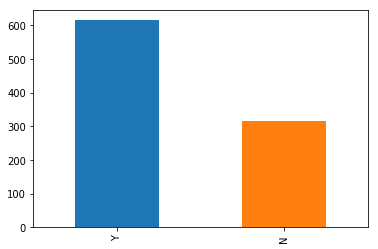

In [30]:
loandata['Loan_Status'].value_counts().plot(kind='bar')

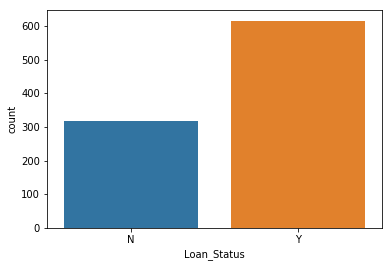

In [31]:
sns.countplot(x=loandata['Loan_Status'])

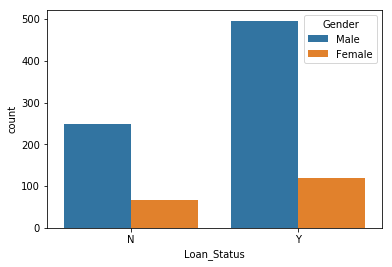

In [32]:
sns.countplot(x=loandata['Loan_Status'], hue=loandata['Gender'])

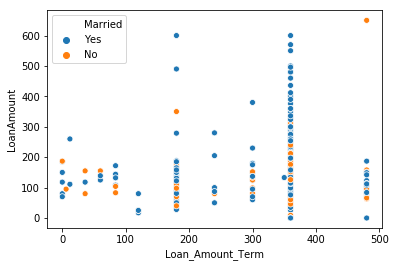

In [33]:
#Loan amount + loan amount term4

sns.scatterplot(x=loandata['Loan_Amount_Term'],y=loandata['LoanAmount'],hue=loandata['Married'])

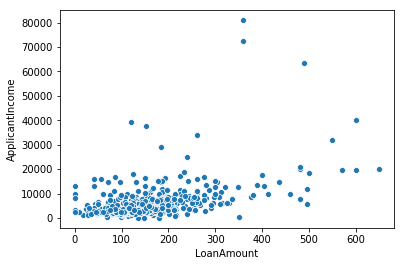

In [34]:
sns.scatterplot(x=loandata['LoanAmount'],y=loandata['ApplicantIncome'])

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


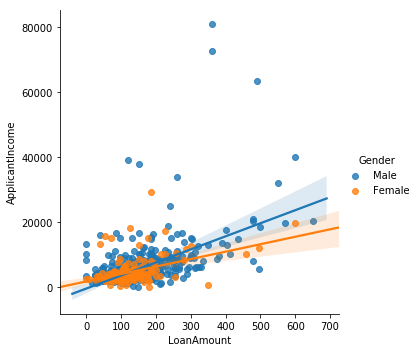

In [35]:
sns.lmplot(x='LoanAmount',y='ApplicantIncome',data=loandata,hue='Gender')

In [36]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP-5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


## Data Transformation

In [37]:
#is our data in the right structure?

loandata['Dependents'].value_counts()

0     538
2     155
1     154
3+     85
Name: Dependents, dtype: int64

In [38]:
#split into features and target variable, by column
feats=loandata.drop(['Loan_Status'],axis=1)



In [39]:
feats.shape

(932, 12)

In [40]:
target= loandata['Loan_Status']


In [41]:
feats.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
target.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [43]:
#drop ID column
feats = feats.drop(['Loan_ID'],axis=1)

In [44]:
#one-hot encoding
feats = pd.get_dummies(feats)

In [45]:
target.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [46]:
train_feats, test_feats, train_target, test_target = train_test_split(feats, target,random_state = 123,test_size=0.3)

In [47]:
train_feats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 168 to 555
Data columns (total 20 columns):
ApplicantIncome            652 non-null int64
CoapplicantIncome          652 non-null float64
LoanAmount                 652 non-null float64
Loan_Amount_Term           652 non-null float64
Credit_History             652 non-null float64
Gender_Female              652 non-null uint8
Gender_Male                652 non-null uint8
Married_No                 652 non-null uint8
Married_Yes                652 non-null uint8
Dependents_0               652 non-null uint8
Dependents_1               652 non-null uint8
Dependents_2               652 non-null uint8
Dependents_3+              652 non-null uint8
Education_Graduate         652 non-null uint8
Education_Not Graduate     652 non-null uint8
Self_Employed_No           652 non-null uint8
Self_Employed_Yes          652 non-null uint8
Property_Area_Rural        652 non-null uint8
Property_Area_Semiurban    652 non-null uint8
Property_Ar

In [48]:
train_target.head()

168    N
943    N
149    Y
10     Y
278    Y
Name: Loan_Status, dtype: object

## Modelling

In [68]:
tree_model= DecisionTreeClassifier(max_depth=3)

In [69]:
tree_model.fit(train_feats,train_target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
predictions = tree_model.predict(test_feats)

In [52]:
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y

In [71]:
predictions == test_target

218    False
263     True
662    False
8       True
595     True
285     True
798     True
431     True
780    False
183    False
227     True
616    False
695    False
151     True
745     True
368     True
403     True
800     True
835     True
198    False
414     True
222     True
376     True
207     True
708     True
773    False
705     True
253     True
155     True
297     True
       ...  
672     True
344     True
941     True
300     True
967     True
430     True
640     True
261     True
689    False
659    False
899     True
939     True
851     True
724     True
264     True
563     True
604     True
593     True
199    False
614    False
765     True
306     True
225    False
254     True
185     True
626     True
827     True
288     True
318    False
256     True
Name: Loan_Status, Length: 280, dtype: bool

In [72]:
print(classification_report(test_target,predictions))

             precision    recall  f1-score   support

          N       0.67      0.39      0.49        98
          Y       0.73      0.90      0.80       182

avg / total       0.71      0.72      0.69       280



In [73]:
dot_data = export_graphviz(tree_model,feature_names = feats.columns,filled = True,rounded=True, out_file=None)

In [74]:
graph = graphviz.Source(dot_data)

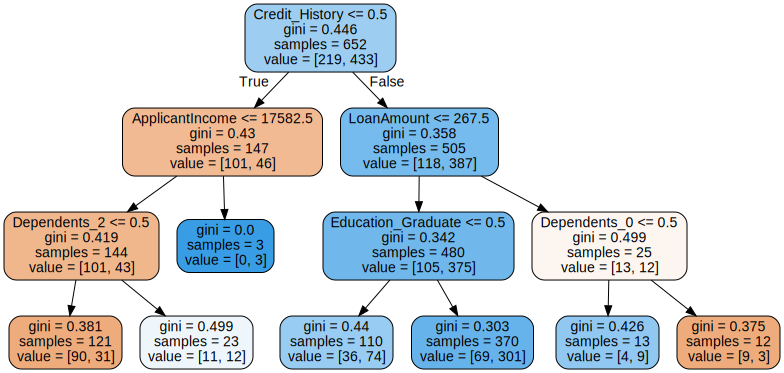

In [75]:
graph

In [59]:
feats.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Making Predictions

Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

We need to compare those values with the test set!

## Model Evaluation

Q: Which model is better? 
> A: 


Q: Why?
> A:

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500